In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df = pd.read_html('https://en.wikipedia.org/wiki/World_Happiness_Report#2018_World_Happiness_Report')

In [52]:
happiness = df[4]

In [53]:
happiness = happiness.rename(columns={'Country/Region': 'Country'})

In [54]:
happiness.head()

,Overall Rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.192,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [19]:
from  pandas_datareader import wb

In [24]:
wbr = wb.WorldBankReader('SI.POV.GINI', 'all', 2015, 2019)

In [31]:
gini = wbr.read().dropna()

In [34]:
gini = gini.groupby('country').apply(lambda x: x.iloc[0])

In [41]:
gini = gini.reset_index()

In [43]:
gini = gini.rename(columns={'country': 'Country'})

In [35]:
# pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_income_equality')

In [36]:
# gini = gini_wiki[3]

In [ ]:
# gini.columns = gini.iloc[0]

In [ ]:
# gini = gini.drop(0)

In [38]:
gini.head()

,SI.POV.GINI
country,
Argentina,40.6
Armenia,33.6
Austria,30.5
Bangladesh,32.4
Belarus,25.4


In [55]:
df = gini.merge(happiness, left_on='Country', right_on='Country')

In [56]:
df = df.set_index('Country')

In [57]:
df = df.apply(lambda x: pd.to_numeric(x, errors='coerse'))

In [71]:
GINI_FIELD = 'SI.POV.GINI'

In [72]:
df[GINI_FIELD].corr(df['Score'])

-0.33153835476935206

In [60]:
df.head()

,SI.POV.GINI,Overall Rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country,,,,,,,,,
Argentina,40.6,29,6.388,1.073,1.468,0.744,0.570,0.062,0.054
Armenia,33.6,129,4.321,0.816,0.990,0.666,0.260,0.077,0.028
Austria,30.5,12,7.139,1.341,1.504,0.891,0.617,0.242,0.224
Bangladesh,32.4,115,4.500,0.532,0.850,0.579,0.580,0.153,0.144
Belarus,25.4,73,5.483,1.039,1.498,0.700,0.307,0.101,0.154


In [67]:
oecd_wiki = pd.read_html('https://en.wikipedia.org/wiki/OECD')

In [68]:
oecd = oecd_wiki[5]

In [63]:
# oecd.columns = oecd.iloc[0]

In [64]:
# oecd = oecd.drop(0)

In [70]:
oecd_df = df.loc[oecd['Country']]

/Users/jordanvalansi/.virtualenv/notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [73]:
oecd_df[GINI_FIELD].corr(oecd_df['Score'])

-0.3603043063733193

In [74]:
oecd_df[[GINI_FIELD, 'Score']].sort_values(GINI_FIELD)

,SI.POV.GINI,Score
Country,,
Slovenia,25.4,5.948
Czech Republic,25.9,6.711
Finland,27.1,7.632
Norway,27.5,7.594
Belgium,27.7,6.927
Netherlands,28.2,7.441
Denmark,28.2,7.555
Sweden,29.2,7.314
Hungary,30.4,5.620


In [75]:
oecd_df = oecd_df.dropna(subset=[GINI_FIELD])

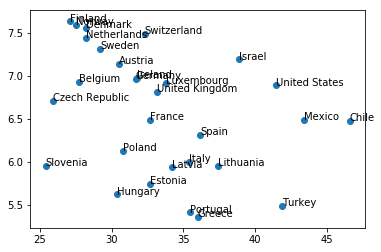

In [76]:
plt.scatter(oecd_df[GINI_FIELD], oecd_df['Score'])
for index, row in oecd_df.iterrows():
    plt.annotate(index, (row[GINI_FIELD], row['Score']))



# nobel loreates

In [83]:
nobel_wiki = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_Nobel_laureates_per_capita')

In [85]:
def html2df(wiki, place=0, header=False, index='Country'):
    df = wiki[place]
    if not header:
        df.columns = df.iloc[0]
        df = df.drop(0)
    df = df.set_index(index)
    return df

In [86]:
nobel = html2df(nobel_wiki, header=True, index='Entity')

In [87]:
nobel.head()

,Rank,Nobellaureates[1],Population(2018)[2],Laureates/10 million
Entity,,,,
Faroe Islands,—,1,49489,202.065
Saint Lucia,1,2,179667,111.317
Luxembourg,2,2,590321,33.880
Switzerland,3,26,8544034,30.431
Sweden,4,30,9982709,30.052


In [88]:
df.head()

,SI.POV.GINI,Overall Rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country,,,,,,,,,
Argentina,40.6,29,6.388,1.073,1.468,0.744,0.570,0.062,0.054
Armenia,33.6,129,4.321,0.816,0.990,0.666,0.260,0.077,0.028
Austria,30.5,12,7.139,1.341,1.504,0.891,0.617,0.242,0.224
Bangladesh,32.4,115,4.500,0.532,0.850,0.579,0.580,0.153,0.144
Belarus,25.4,73,5.483,1.039,1.498,0.700,0.307,0.101,0.154


In [89]:
df = df.merge(nobel, right_index=True, left_index=True)

In [90]:
df.head()

,SI.POV.GINI,Overall Rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Rank,Nobellaureates[1],Population(2018)[2],Laureates/10 million
Argentina,40.6,29,6.388,1.073,1.468,0.744,0.570,0.062,0.054,47,5,44688864,1.119
Austria,30.5,12,7.139,1.341,1.504,0.891,0.617,0.242,0.224,8,21,8751820,23.995
Bangladesh,32.4,115,4.500,0.532,0.850,0.579,0.580,0.153,0.144,72,1,166368149,0.060
Belarus,25.4,73,5.483,1.039,1.498,0.700,0.307,0.101,0.154,36,2,9452113,2.116
Belgium,27.7,16,6.927,1.324,1.483,0.894,0.583,0.188,0.240,19,10,11498519,8.697


In [91]:
df['Laureates/10 million'] = pd.to_numeric(df['Laureates/10 million'])

In [93]:
df['Laureates/10 million'].corr(df[GINI_FIELD])

-0.4163055921960925

In [94]:
oecd_df = df.loc[oecd['Country']]

/Users/jordanvalansi/.virtualenv/notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [95]:
oecd_df['Laureates/10 million'].corr(oecd_df[GINI_FIELD])

-0.38785770158891925

In [96]:
oecd_df = oecd_df.dropna(subset=[GINI_FIELD])

In [97]:
def plot_df(df, y, x=GINI_FIELD):
    df = df.dropna(subset=[GINI_FIELD])
    plt.scatter(df[x], df[y])
    for index, row in oecd_df.iterrows():
        plt.annotate(index, (row[x], row[y]))



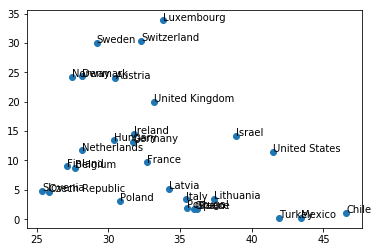

In [98]:
plot_df(oecd_df, 'Laureates/10 million')

# IQ

In [99]:
iq = html2df(pd.read_html('https://brainstats.com/average-iq-by-country.html'), header=True)

In [100]:
df = df.merge(iq, right_index=True, left_index=True)

In [101]:
df['IQ'].corr(df[GINI_FIELD])

-0.4864785439930811

In [102]:
oecd_df = df.loc[oecd['Country']].dropna(subset=[GINI_FIELD])

/Users/jordanvalansi/.virtualenv/notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [103]:
oecd_df['IQ'].corr(oecd_df[GINI_FIELD])

-0.6419512863118263

In [ ]:
plot_df(oecd_df, 'IQ')

In [ ]:
# I guess I need to also remove the impact of the gdp per capita...

# GDP

In [128]:
GDP_COL = 'NY.GDP.PCAP.PP.CD'

In [129]:
gdp = wb.WorldBankReader(GDP_COL, countries='all').read()

In [130]:
gdp = gdp.dropna()

In [131]:
gdp.head()

NY.GDP.PCAP.PP.CD
country    year                   
Arab World 2017       16955.436018
           2016       16792.454918
           2015       16362.531210
           2014       16013.775954
           2013       15705.741553

In [132]:
gdp = gdp.groupby('country').apply(lambda x: x.iloc[0])

In [140]:
df = df.merge(gdp, left_index=True, right_index=True)

In [139]:
df = df.drop(columns='NY.GDP.PCAP.PP.CD_y')

In [141]:
df[GDP_COL].corr(df[GINI_FIELD])

-0.35969989903347804

In [142]:
oecd_df = df.loc[oecd['Country']]

/Users/jordanvalansi/.virtualenv/notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [143]:
oecd_df[GDP_COL].corr(oecd_df[GINI_FIELD])

-0.3103160159236183

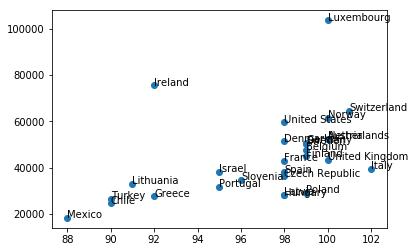

In [145]:
plot_df(oecd_df, GDP_COL, 'IQ')